In [ ]:
!pip install mlxtend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
book = pd.read_csv("book.csv")

In [ ]:
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
book.shape

(2000, 11)

In [ ]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(book,min_support=0.1,max_len=3,use_colnames = True)
frequent_itemsets

C:\Users\RAM BABU\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [ ]:
print(len(frequent_itemsets))

39


In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(book, min_support=0.1,use_colnames=True, verbose=1)
print(frequent_itemsets.head())

Processing 44 combinations | Sampling itemset size 4
   support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)


C:\Users\RAM BABU\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
frequent_itemsets.sort_values("support",ascending = False).head()

,support,itemsets
2,0.431,(CookBks)
0,0.423,(ChildBks)
3,0.282,(DoItYBks)
6,0.276,(GeogBks)
10,0.256,"(CookBks, ChildBks)"


In [ ]:
rules=association_rules(frequent_itemsets, metric="confidence",min_threshold=0.5)
print(rules.head())

  antecedents consequents  antecedent support  consequent support  support  \
0  (YouthBks)  (ChildBks)              0.2475               0.423   0.1650   
1   (CookBks)  (ChildBks)              0.4310               0.423   0.2560   
2  (ChildBks)   (CookBks)              0.4230               0.431   0.2560   
3  (DoItYBks)  (ChildBks)              0.2820               0.423   0.1840   
4    (RefBks)  (ChildBks)              0.2145               0.423   0.1515   

   confidence      lift  leverage  conviction  
0    0.666667  1.576044  0.060308    1.731000  
1    0.593968  1.404179  0.073687    1.421069  
2    0.605201  1.404179  0.073687    1.441240  
3    0.652482  1.542511  0.064714    1.660347  
4    0.706294  1.669725  0.060767    1.964548  


In [ ]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="lift",min_threshold=1)
rules.head(10)
rules.sort_values("lift",ascending= False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
82,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
99,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [ ]:
rules[(rules.support > 0.015) & (rules.confidence > 0.4)].sort_values("confidence",ascending=False).shape

(70, 9)

In [ ]:
rules["lhs items"]=rules["antecedents"].apply(lambda x:len(x))
rules[rules["lhs items"]>1].sort_values("lift",ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
82,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
94,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
54,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

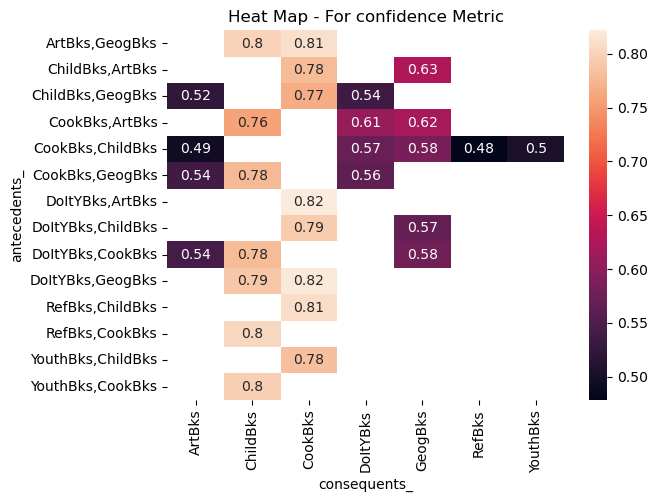

In [ ]:
rules["antecedents_"]=rules["antecedents"].apply(lambda a: ",".join(list(a)))
rules["consequents_"]=rules["consequents"].apply(lambda a:",".join(list(a)))
pivot =rules[rules["lhs items"]>1].pivot(index = "antecedents_",
                                        columns = "consequents_",values="confidence")
sns.heatmap(pivot,annot = True)
plt.title("Heat Map - For confidence Metric")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [ ]:
rules_li=association_rules(frequent_itemsets,metric="lift",min_threshold=0.6)
print(rules_li.shape)

(100, 9)


In [ ]:
rules_li["lhs items"] = rules_li["antecedents"].apply(lambda x:len(x))
rules_li[rules_li["lhs items"]>1].sort_values("lift",ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
82,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
94,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
54,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

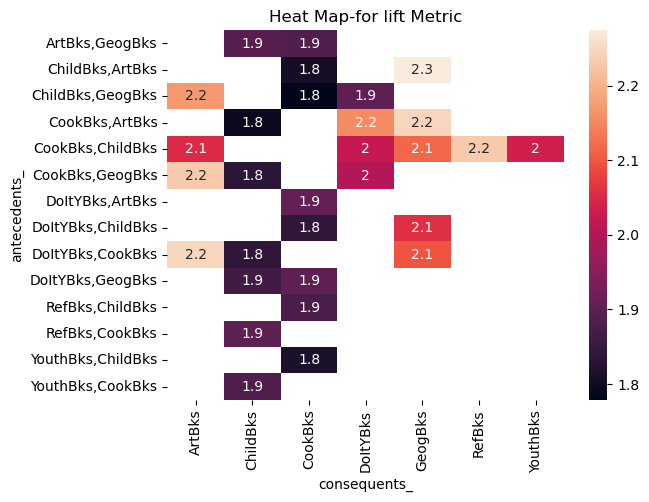

In [ ]:
rules_li["antecedents_"]=rules_li["antecedents"].apply(lambda a:",".join(list(a)))
rules_li["consequents_"]=rules_li["consequents"].apply(lambda a:",".join(list(a)))
pivot = rules_li[rules_li["lhs items"]>1].pivot(index = "antecedents_",columns="consequents_",values="lift")
sns.heatmap(pivot, annot =True)
plt.title("Heat Map-for lift Metric")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

FP_GROWTH

In [ ]:
frequent_itemsets_fp= fpgrowth(book, min_support =0.1,use_colnames=True,verbose=1)
print(frequent_itemsets_fp.shape)

9 itemset(s) from tree conditioned on items ()
2 itemset(s) from tree conditioned on items (DoItYBks)
1 itemset(s) from tree conditioned on items (DoItYBks, ChildBks)
0 itemset(s) from tree conditioned on items (DoItYBks, CookBks)
3 itemset(s) from tree conditioned on items (GeogBks)
2 itemset(s) from tree conditioned on items (GeogBks, DoItYBks)
0 itemset(s) from tree conditioned on items (GeogBks, DoItYBks, CookBks)
0 itemset(s) from tree conditioned on items (GeogBks, DoItYBks, ChildBks)
0 itemset(s) from tree conditioned on items (GeogBks, ChildBks)
1 itemset(s) from tree conditioned on items (GeogBks, CookBks)
4 itemset(s) from tree conditioned on items (YouthBks)
0 itemset(s) from tree conditioned on items (YouthBks, GeogBks)
0 itemset(s) from tree conditioned on items (YouthBks, DoItYBks)
0 itemset(s) from tree conditioned on items (YouthBks, ChildBks)
1 itemset(s) from tree conditioned on items (YouthBks, CookBks)
1 itemset(s) from tree conditioned on items (ChildBks)
0 itemset

C:\Users\RAM BABU\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
frequent_itemsets_fp.sort_values("support",ascending=False).head()

,support,itemsets
4,0.431,(CookBks)
3,0.423,(ChildBks)
0,0.282,(DoItYBks)
1,0.276,(GeogBks)
23,0.256,"(CookBks, ChildBks)"


In [ ]:
rules_fp =association_rules(frequent_itemsets_fp,metric="confidence",min_threshold=0.5)
print(rules_fp.shape)

(49, 9)


In [ ]:
rules_fp[(rules_fp.support > 0.15) & (rules_fp.confidence > 0.4)].sort_values("confidence",ascending= False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
6,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
27,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
7,(GeogBks),(CookBks),0.2760,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
34,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095


In [ ]:
rules_fp["lhs items"] = rules_fp["antecedents"].apply(lambda x:len(x))
rules_fp[rules_fp["lhs items"]>1].sort_values("lift",ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
46,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.276,0.1020,0.627692,2.274247,0.057150,1.944628,2
39,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.241,0.1015,0.541333,2.246196,0.056313,1.654797,2
42,"(CookBks, ArtBks)",(GeogBks),0.1670,0.276,0.1035,0.619760,2.245509,0.057408,1.904063,2
43,"(CookBks, GeogBks)",(ArtBks),0.1925,0.241,0.1035,0.537662,2.230964,0.057107,1.641657,2
45,"(ChildBks, GeogBks)",(ArtBks),0.1950,0.241,0.1020,0.523077,2.170444,0.055005,1.591452,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'YouthBks')])

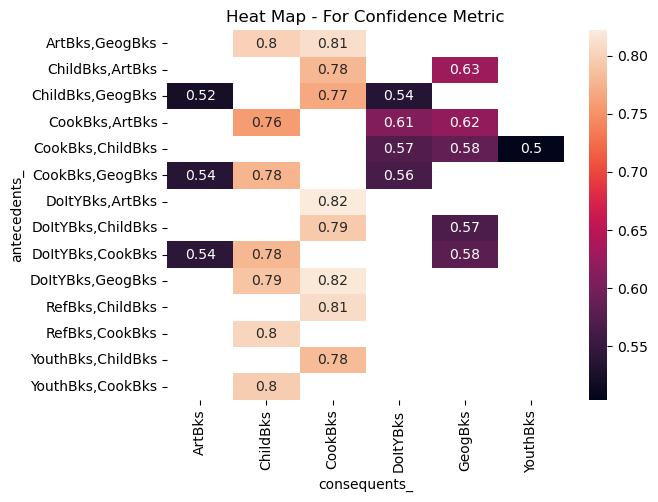

In [ ]:
rules_fp["antecedents_"] = rules_fp["antecedents"].apply(lambda a:",".join(list(a)))
rules_fp["consequents_"] = rules_fp["consequents"].apply(lambda a:",".join(list(a)))
pivot = rules_fp[rules_fp["lhs items"]>1].pivot(index= "antecedents_",columns = "consequents_",values="confidence")
sns.heatmap(pivot, annot = True)
plt.title("Heat Map - For Confidence Metric")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [ ]:
rules_fp_li = association_rules(frequent_itemsets_fp, metric= "lift", min_threshold=0.6)
print(rules_fp_li.shape)

(100, 9)


In [ ]:
rules_fp_li["lhs items"]= rules_fp_li["antecedents"].apply(lambda x:len(x))
rules_fp_li[rules_fp_li["lhs items"]>1].sort_values("lift",ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
93,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
80,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
86,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
87,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
60,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

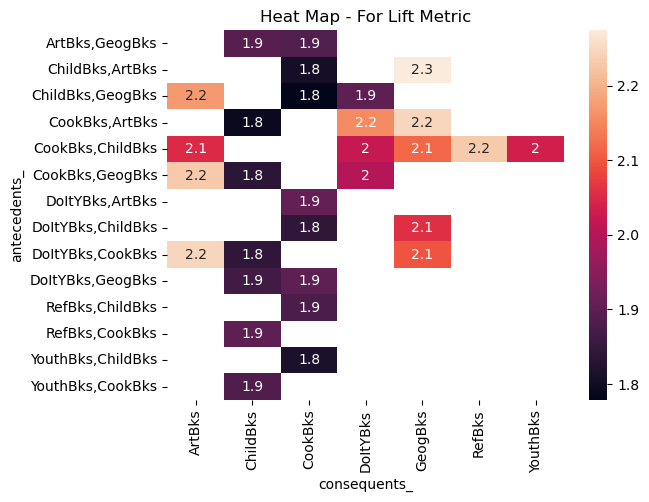

In [ ]:
rules_fp_li["antecedents_"]=rules_fp_li["antecedents"].apply(lambda a:",".join(list(a)))
rules_fp_li["consequents_"]=rules_fp_li["consequents"].apply(lambda a:",".join(list(a)))
pivot = rules_fp_li[rules_fp_li["lhs items"]>1].pivot(index = "antecedents_",columns="consequents_",values="lift")
sns.heatmap(pivot,annot=True)
plt.title("Heat Map - For Lift Metric")
plt.yticks(rotation=0)
plt.xticks(rotation=90)